In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df1=df.iloc[:,1:]
for c in df1.columns:
    print(df1[c].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtyp

<AxesSubplot:title={'center':'Loan_Status'}>

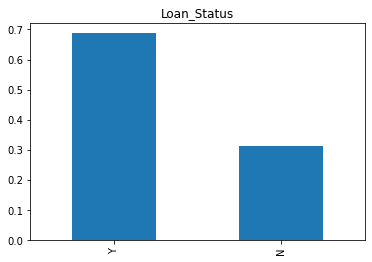

In [9]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')
#sns.countplot(x="Loan_Status", data=df)
#plt.xlabel('Loan_Status (Y=Yes, N=No)')
#plt.ylabel('Total')
#plt.show()

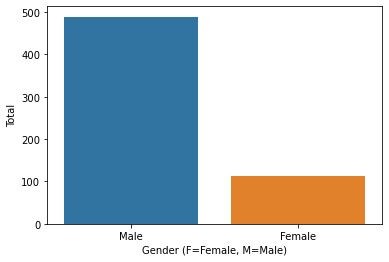

In [10]:
sns.countplot(x="Gender", data=df)
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

<AxesSubplot:title={'center':'Married'}>

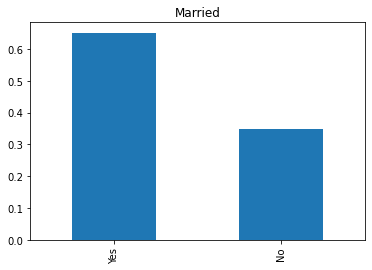

In [11]:
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

<AxesSubplot:title={'center':'Self_Employed'}>

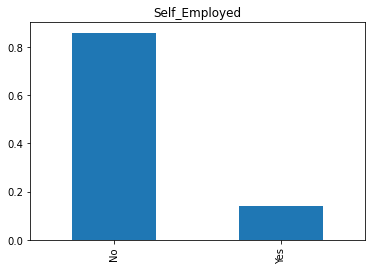

In [12]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

<AxesSubplot:title={'center':'Credit_History'}>

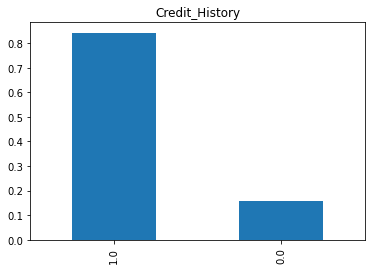

In [13]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Dependents'}>

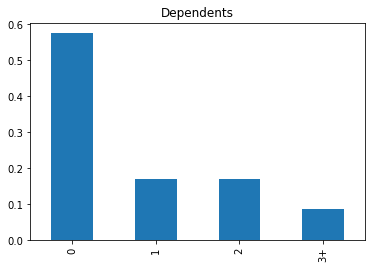

In [14]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

<AxesSubplot:title={'center':'Education'}>

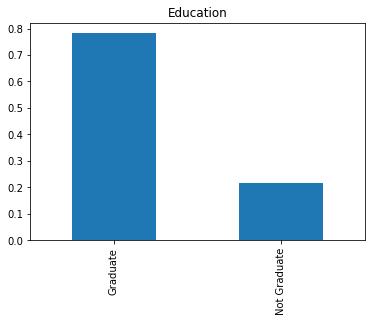

In [15]:
df["Education"].value_counts(normalize=True).plot.bar(title = "Education")


<AxesSubplot:title={'center':'Property_Area'}>

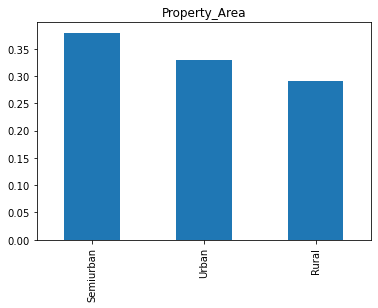

In [16]:
df["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

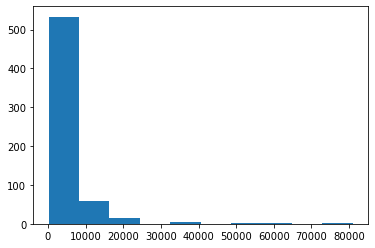

In [17]:

plt.hist(df["ApplicantIncome"])
plt.show()

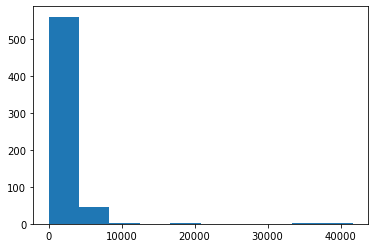

In [18]:
plt.hist(df["CoapplicantIncome"])
plt.show()

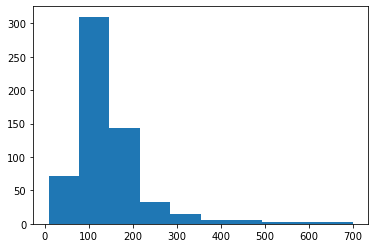

In [19]:

plt.hist(df['LoanAmount'])

plt.show()


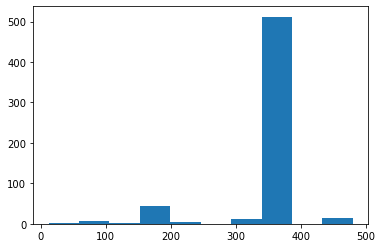

In [20]:
plt.hist(df["Loan_Amount_Term"])
plt.show()

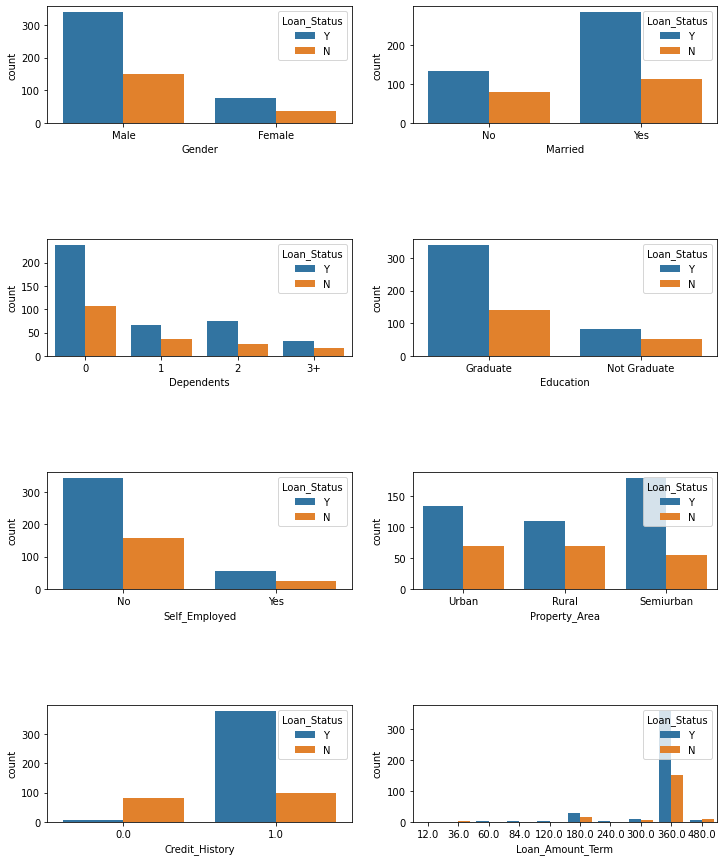

In [21]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

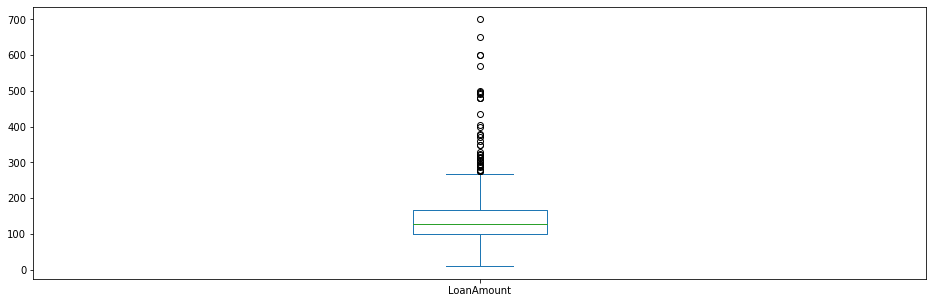

In [22]:
df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

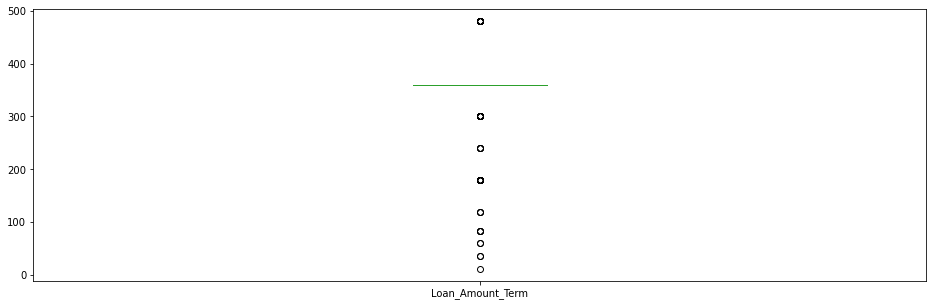

In [23]:
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

In [24]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)

df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [25]:
df_test = pd.read_csv("test_lAUu6dG.csv")

In [26]:
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [27]:
df_test.shape

(367, 12)

In [28]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test["Dependents"].mode()[0],inplace=True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace=True)
df_test["Credit_History"].fillna(df_test["Credit_History"].mode()[0],inplace=True)
df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode()[0],inplace=True)
df_test["LoanAmount"].fillna(df_test["LoanAmount"].median(),inplace=True)

In [30]:
df_test_id=df_test['Loan_ID']

In [31]:
#df=df.drop("Loan_ID",axis=1)
df_test=df_test.drop("Loan_ID",axis=1)

In [32]:
X=df.drop("Loan_Status",1)

In [33]:
Y=df[["Loan_Status"]]

In [34]:
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [35]:
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
X['Married'] = X['Married'].map({'Yes': 1, 'No': 0})
X['Self_Employed'] = X['Self_Employed'].map({'Yes': 1, 'No': 0})
X['Education'] = X['Education'].map({'Graduate': 1, 'Not Graduate': 2})
X['Property_Area'] = X['Property_Area'].map({'Urban': 1, 'Semiurban': 2, 'Rural':3})
X['Dependents'] = X['Dependents'].map({'0': 0, '1': 1, '2':2,'3+':3})

X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,3
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,3
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [36]:
Y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [37]:
Y['Loan_Status'] = Y['Loan_Status'].map({'Y': 1, 'N': 0})

Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,test_size=0.3,random_state=1)

In [39]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [40]:
accuracy=[]
f1=[]
model=[]

In [41]:
#*********GaussianNB****************#

In [42]:
gnb_model = GaussianNB()

In [43]:
gnb_model.fit(X_train, Y_train)
GaussianNB()

GaussianNB()

In [44]:
predicted = gnb_model.predict(X_test)
expected = Y_test
print(predicted) 

print(expected) 

[1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1]
     Loan_Status
533            0
544            1
41             1
148            0
111            1
..           ...
180            0
491            1
42             1
530            1
457            0

[185 rows x 1 columns]


In [45]:
gb_Y_predicted_test = gnb_model.predict(X_test)
gb_Y_predicted_train = gnb_model.predict(X_train)

In [46]:
#accuracy_score(Y_train,gb_Y_predicted_train,normalize=True)
accuracy.append(np.round(accuracy_score(Y_train,gb_Y_predicted_train,normalize=True),2))
model.append('GaussianNB')

In [47]:
accuracy_score(Y_test,gb_Y_predicted_test,normalize=True)


0.7837837837837838

In [48]:
confusion_matrix(Y_train, gb_Y_predicted_train)

array([[ 62,  69],
       [ 14, 284]])

In [49]:
confusion_matrix(Y_test, gb_Y_predicted_test)

array([[ 27,  34],
       [  6, 118]])

In [50]:
print(classification_report(Y_train, gb_Y_predicted_train))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60       131
           1       0.80      0.95      0.87       298

    accuracy                           0.81       429
   macro avg       0.81      0.71      0.74       429
weighted avg       0.81      0.81      0.79       429



In [51]:
print(classification_report(Y_test, gb_Y_predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        61
           1       0.78      0.95      0.86       124

    accuracy                           0.78       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



In [52]:
#************MultinomialNB*******************#

In [53]:
m_model = MultinomialNB()

In [54]:
m_model.fit(X_train, Y_train)
MultinomialNB()

MultinomialNB()

In [55]:
predicted = m_model.predict(X_test)
expected = Y_test
print(predicted) 

print(expected) 

[1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0]
     Loan_Status
533            0
544            1
41             1
148            0
111            1
..           ...
180            0
491            1
42             1
530            1
457            0

[185 rows x 1 columns]


In [56]:
m_Y_predicted_test = m_model.predict(X_test)
m_Y_predicted_train = m_model.predict(X_train)

In [57]:
#accuracy_score(Y_train,m_Y_predicted_train,normalize=True)
accuracy.append(np.round(accuracy_score(Y_train,m_Y_predicted_train,normalize=True),2))
model.append('MultinomialNB')

In [58]:
accuracy_score(Y_test,m_Y_predicted_test,normalize=True)

0.4540540540540541

In [59]:
confusion_matrix(Y_train, m_Y_predicted_train)

array([[ 56,  75],
       [142, 156]])

In [60]:
confusion_matrix(Y_test, m_Y_predicted_test)

array([[31, 30],
       [71, 53]])

In [61]:
print(classification_report(Y_train, m_Y_predicted_train))

              precision    recall  f1-score   support

           0       0.28      0.43      0.34       131
           1       0.68      0.52      0.59       298

    accuracy                           0.49       429
   macro avg       0.48      0.48      0.47       429
weighted avg       0.56      0.49      0.51       429



In [62]:
print(classification_report(Y_test, m_Y_predicted_test))

              precision    recall  f1-score   support

           0       0.30      0.51      0.38        61
           1       0.64      0.43      0.51       124

    accuracy                           0.45       185
   macro avg       0.47      0.47      0.45       185
weighted avg       0.53      0.45      0.47       185



In [63]:
#***************BernoulliNB********************#

In [64]:
b_model = BernoulliNB()

In [65]:
b_model.fit(X_train, Y_train)
BernoulliNB()

BernoulliNB()

In [66]:
predicted = b_model.predict(X_test)
expected = Y_test
print(predicted) 

print(expected) 

[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1]
     Loan_Status
533            0
544            1
41             1
148            0
111            1
..           ...
180            0
491            1
42             1
530            1
457            0

[185 rows x 1 columns]


In [67]:
b_Y_predicted_test = b_model.predict(X_test)
b_Y_predicted_train = b_model.predict(X_train)

In [68]:
#accuracy_score(Y_train,b_Y_predicted_train,normalize=True)
accuracy.append(np.round(accuracy_score(Y_train,b_Y_predicted_train,normalize=True),2))
model.append('BernoulliNB')

In [69]:
accuracy_score(Y_test,b_Y_predicted_test,normalize=True)

0.7891891891891892

In [70]:
confusion_matrix(Y_train, b_Y_predicted_train)

array([[ 58,  73],
       [  5, 293]])

In [71]:
confusion_matrix(Y_test, b_Y_predicted_test)

array([[ 24,  37],
       [  2, 122]])

In [72]:
print(classification_report(Y_train, b_Y_predicted_train))

              precision    recall  f1-score   support

           0       0.92      0.44      0.60       131
           1       0.80      0.98      0.88       298

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429



In [73]:
print(classification_report(Y_test, b_Y_predicted_test))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [74]:

#******************KNN**************************#

In [75]:
rob_scaler = RobustScaler()

In [76]:
rob_scaler.fit(X_train)

RobustScaler()

In [77]:
rob_X_train_scaler = rob_scaler. transform(X_train)
rob_X_test_scaler = rob_scaler.transform(X_test)
rob_X_train_scaler 

array([[   0. ,    0. ,    0.5, ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ..., -240. ,    0. ,    0. ],
       [   0. ,    0. ,    1. , ..., -180. ,   -1. ,   -0.5],
       ...,
       [   0. ,   -1. ,    0. , ...,  -60. ,    0. ,    0. ],
       [   0. ,    0. ,    0.5, ...,    0. ,    0. ,    0.5],
       [  -1. ,    0. ,    0. , ...,    0. ,    0. ,    0. ]])

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [79]:
knn.fit(rob_X_train_scaler,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
rob_y_pred_train = knn.predict(rob_X_train_scaler)
rob_y_pred_test = knn.predict(rob_X_test_scaler)

In [82]:
#accuracy_score(rob_y_pred_train,Y_train )
accuracy.append(np.round(accuracy_score(rob_y_pred_train,Y_train ),2))
model.append('Knn-RobustScaler')

In [83]:
confusion_matrix(rob_y_pred_train,Y_train)

array([[131, 298],
       [  0,   0]])

In [84]:
print(classification_report(Y_train,rob_y_pred_train))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47       131
           1       0.00      0.00      0.00       298

    accuracy                           0.31       429
   macro avg       0.15      0.50      0.23       429
weighted avg       0.09      0.31      0.14       429



In [85]:
#************StandardScaler************#

In [86]:
scalar = StandardScaler()

In [87]:
scalar.fit(rob_X_train_scaler)

StandardScaler()

In [88]:
X_train_scl = scalar.transform(rob_X_train_scaler)

In [89]:
X_test_scl = scalar.transform(rob_X_test_scaler)

In [90]:
scalar.mean_

array([-1.67832168e-01, -3.24009324e-01,  3.97435897e-01,  2.12121212e-01,
        1.49184149e-01,  5.94083336e-01,  3.05011623e-01,  3.27618618e-01,
       -1.73426573e+01, -1.46853147e-01,  3.49650350e-03])

In [91]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [92]:
knn.fit(X_train_scl,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [93]:
scl_y_pred_train = knn.predict(X_train_scl)
scl_y_pred_test = knn.predict(X_test_scl)

In [94]:
#accuracy_score(scl_y_pred_train,Y_train )
accuracy.append(np.round(accuracy_score(scl_y_pred_train,Y_train ),2))
model.append('Knn-StandardScaler')

In [95]:
confusion_matrix(scl_y_pred_train,Y_train)

array([[ 55,   6],
       [ 76, 292]])

In [96]:
print(classification_report(Y_train,scl_y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57       131
           1       0.79      0.98      0.88       298

    accuracy                           0.81       429
   macro avg       0.85      0.70      0.72       429
weighted avg       0.83      0.81      0.78       429



In [97]:
#*****************MINMAXScaler***************#

In [98]:
mm_scalar = MinMaxScaler()

In [99]:
mm_scalar.fit(rob_X_train_scaler)

MinMaxScaler()

In [100]:
X_train_mm = scalar.transform(rob_X_train_scaler)
X_test_mm = scalar.transform(rob_X_test_scaler)

In [101]:
knn = KNeighborsClassifier(n_neighbors = 15)

In [102]:
knn.fit(X_train_mm,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [103]:
mm_y_pred_train = knn.predict(X_train_mm)
mm_y_pred_test = knn.predict(X_test_mm)

In [104]:
#accuracy_score(mm_y_pred_train,Y_train )
accuracy.append(np.round(accuracy_score(mm_y_pred_train,Y_train  ),2))
model.append('Knn-MinMaxScaler')

In [105]:
confusion_matrix(mm_y_pred_train,Y_train)

array([[ 54,   5],
       [ 77, 293]])

In [106]:
print(classification_report(Y_train,mm_y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.41      0.57       131
           1       0.79      0.98      0.88       298

    accuracy                           0.81       429
   macro avg       0.85      0.70      0.72       429
weighted avg       0.83      0.81      0.78       429



In [107]:
#*********************not splitting the data into x-train and xtest, using the train and test csv files directly***********##

In [108]:
#Test_X=df_test.drop("Loan_Status",1)

In [109]:
#Y=df[["Loan_Status"]]

In [110]:
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y,test_size=0.3,random_state=1)

In [111]:
df_test.shape
df.shape

(614, 12)

In [112]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [113]:
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1, 'No': 0})
df_test['Self_Employed'] =df_test['Self_Employed'].map({'Yes': 1, 'No': 0})
df_test['Education'] = df_test['Education'].map({'Graduate': 1, 'Not Graduate': 2})
df_test['Property_Area'] = df_test['Property_Area'].map({'Urban': 1, 'Semiurban': 2, 'Rural':3})
df_test['Dependents'] = df_test['Dependents'].map({'0': 0, '1': 1, '2':2,'3+':3})

df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,1,0,0,2,0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,2,1,4009,1777,113.0,360.0,1.0,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,1
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,2
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,3


In [114]:
X_train = X
Y_train = Y
X_test  = df_test

In [115]:
test_gNB_model = GaussianNB()

In [116]:
test_gNB_model.fit(X_train,Y_train)
GaussianNB()

GaussianNB()

In [117]:
predicted = test_gNB_model.predict(df_test)
expected = df_test
print(predicted) 

print(expected) 

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          1              0             5720   
1         1        1           1          1              0             3076   
2         1       

In [118]:
predicted[0:5]

array([1, 1, 1, 1, 1])

In [119]:
result=pd.DataFrame({'LoanID':df_test_id,
                    'Loan_Status':predicted})
result.head()

,LoanID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [120]:
model

['GaussianNB',
 'MultinomialNB',
 'BernoulliNB',
 'Knn-RobustScaler',
 'Knn-StandardScaler',
 'Knn-MinMaxScaler']

In [121]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy})
output

,Model,Accuracy
0,GaussianNB,0.81
1,MultinomialNB,0.49
2,BernoulliNB,0.82
3,Knn-RobustScaler,0.31
4,Knn-StandardScaler,0.81
5,Knn-MinMaxScaler,0.81
